In [1]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from rich.progress import track
import os
from itertools import combinations
from numpy import array

In [5]:
# with open('readings_timeid_sa1.pkl','wb') as f:
    # pickle.dump(new_result,f)

#load
# with open('readings_timeid_sa1.pkl','rb') as f:
#     new_result = pickle.load(f)

#2
with open('readings_timeid.pkl','rb') as f:
    results = pickle.load(f)
# len(total_id_list)
results_ones = np.zeros_like(results)
results_ones[np.where(results > 0)] = 1

In [3]:
#3
with open('readings_timeid_sa2.pkl','rb') as f:
    nnew_results = pickle.load(f)

nnew_results_ones = np.zeros_like(nnew_results)
nnew_results_ones[np.where(nnew_results > 0)] = 1

In [4]:
#4
total_id_list = [  
         3,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,  17,  18,
        19,  21,  23,  24,  25,  26,  27,  30,  31,  32,  33,  34,  35,
        36,  37,  39,  40,  41,  42,  43,  44,  45,  46,  47,  49,  50,
        51,  53,  54,  55,  56,  57,  59,  60,  61,  62,  63,  64,  65,
        66,  68,  69,  70,  71,  72,  73,  75,  76,  79,  80,  81,  82,
        84,  85,  87,  88,  89,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 103, 104, 105, 106, 107, 109, 111, 121, 122]

In [7]:
#5
nnew_id_list = [3, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 21, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 53, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 79, 80, 81, 82, 84, 85, 87, 88, 92, 93, 94, 96, 97, 98, 100, 103, 104, 109, 111, 122]

In [6]:
#6
steps =      [24, 34, 46, 8, 45, 23, 26, 12, 41, 18, 15, 17, 14, 25, 36, 32, 100, 93, 11, 70, 96, 51, 87, 54, 104, 103, 66, 39, 49, 97, 84, 76, 80, 53, 111, 122, 75, 107, 21, 79, 13, 73, 89, 68, 31, 30, 106, 60, 50, 65, 42, 5, 37, 121, 105, 72, 3, 61, 57, 109, 99, 56, 81, 59, 62, 88, 33, 71, 10, 9, 98, 19, 95, 55, 82, 94, 92, 69, 40, 35, 43, 64, 63, 0, 0, 0, 0, 0, 0]
nnew_steps = [24, 39, 14, 34, 46, 8, 45, 26, 23, 13, 12, 41, 18, 15, 17, 25, 9, 32, 79, 100, 10, 11, 70, 96, 51, 87, 85, 104, 54, 53, 49, 97, 84, 103, 66, 94, 36, 93, 31, 76, 122, 111, 75, 80, 21, 64, 68, 44, 43, 60, 65, 50, 73, 33, 88, 72, 30, 81, 71, 98, 59, 62, 42, 37, 5, 109, 61, 3, 57, 92, 69, 35, 55, 82, 63, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [8]:
#7
origin_se_ids = steps[:50]
sa_se_ids = nnew_steps[:50]

In [9]:
#8
sensor_num = np.arange(50,10,-1)
windows = np.arange(5,20,1)

with open('all_results.pkl','rb') as f:
    all_results = pickle.load(f)

with open('all_results_sa.pkl','rb') as f:
    all_results_sa = pickle.load(f)

In [9]:
sensor_num = np.arange(50,10,-1)
print(sensor_num)

# [sensor_num][time_length][0 for origin, 1 for sa]

all_results = {}
all_results_sa = {}

for num in sensor_num:
    all_results[num] = {}
    all_results_sa[num] = {}

    intersection = np.ones(745*686)

    intersection_new = np.ones(745*686)

    for id in origin_se_ids[:num]:
        intersection = intersection * results_ones.T[id]
    
    for id in sa_se_ids[:num]:
        intersection_new = intersection_new * nnew_results_ones.T[id]


    windows = np.arange(5,20,1)

    for window in windows:

        res = []

        for i,item in enumerate(intersection):
            if 0 in intersection[i:i+window]:
                pass
            else:
                res.append(i)
        
        all_results[num][window] = res

        print(num,window,len(res),'ori')
        res = []

        for i,ite, in enumerate(intersection_new):
            if 0 in intersection_new[i:i+window]:
                pass
            else:
                res.append(i)
        all_results_sa[num][window] = res

        print(num,window,len(res),'sa')



[50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27
 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11]
50 5 17533 ori
50 5 25244 sa
50 6 14678 ori
50 6 21742 sa
50 7 12403 ori
50 7 18911 sa
50 8 10579 ori
50 8 16551 sa
50 9 9096 ori
50 9 14596 sa
50 10 7921 ori
50 10 13028 sa
50 11 6938 ori
50 11 11706 sa
50 12 6095 ori
50 12 10551 sa
50 13 5373 ori
50 13 9523 sa
50 14 4758 ori
50 14 8619 sa
50 15 4229 ori
50 15 7829 sa
50 16 3765 ori
50 16 7141 sa
50 17 3352 ori
50 17 6508 sa
50 18 2982 ori
50 18 5933 sa
50 19 2661 ori
50 19 5433 sa
49 5 18426 ori
49 5 28196 sa
49 6 15444 ori
49 6 24406 sa
49 7 13063 ori
49 7 21339 sa
49 8 11146 ori
49 8 18768 sa
49 9 9584 ori
49 9 16607 sa
49 10 8334 ori
49 10 14867 sa
49 11 7286 ori
49 11 13389 sa
49 12 6389 ori
49 12 12096 sa
49 13 5618 ori
49 13 10946 sa
49 14 4963 ori
49 14 9933 sa
49 15 4400 ori
49 15 9045 sa
49 16 3911 ori
49 16 8267 sa
49 17 3475 ori
49 17 7552 sa
49 18 3088 ori
49 18 6900 sa
49 19 2751 ori
49 19 6326 sa
48

In [10]:
import pickle


with open('all_results_0315.pkl','wb') as f:
    pickle.dump(all_results,f)

with open('all_results_sa_0315.pkl','wb') as f:
    pickle.dump(all_results_sa,f)

In [10]:
#9
import pickle


with open('all_results_0315.pkl','rb') as f:
    all_results = pickle.load(f)
    # pickle.dump(all_results,f)

with open('all_results_sa_0315.pkl','rb') as f:
    # pickle.dump(all_results_sa,f)
    all_results_sa = pickle.load(f)

In [11]:
#10
sensor_num = np.arange(15,50,1)

In [12]:
#11
all_results_num = {}
all_results_num_sa = {}

for i in sensor_num:
    all_results_num[i] = {}
    all_results_num_sa[i] = {}
    for j in windows:
        all_results_num[i][j] = len(all_results[i][j])
        all_results_num_sa[i][j] = len(all_results_sa[i][j])


In [13]:
#12
test_df = pd.DataFrame(all_results_num)
test_df_sa = pd.DataFrame(all_results_num_sa)

In [101]:
test_df.to_excel('all_results.xls')
test_df_sa.to_excel('all_results_sa.xls')


/tmp/ipykernel_2030569/1921228034.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  test_df.to_excel('all_results.xls')
/tmp/ipykernel_2030569/1921228034.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed

In [14]:
#13
test_np = test_df.to_numpy()
test_np_sa = test_df_sa.to_numpy()

/tmp/ipykernel_57199/2657012287.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


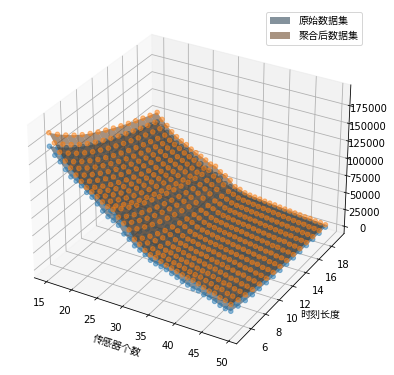

In [40]:
#14
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as mf
from matplotlib import rc

fig = plt.figure(figsize=(5,5))

ax = Axes3D(fig)
# ax.view_init(45, 80)

my_font= mf.FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc') # 加载字体
rc('text',usetex=False) # 去取消利用Latex渲染标签

X,Y = np.meshgrid(sensor_num,windows)

surf1 = ax.plot_surface(X,Y,test_np,alpha=0.5,rstride=1,cstride=1,label='原始数据集')
surf2 = ax.plot_surface(X,Y,test_np_sa,alpha=0.5,rstride=1,cstride=1,label='聚合后数据集')
surf1._facecolors2d = surf1._facecolor3d
surf1._edgecolors2d = surf1._edgecolor3d
surf2._facecolors2d = surf2._facecolor3d
surf2._edgecolors2d = surf2._edgecolor3d
ax.set_xlabel('传感器个数',fontproperties=my_font)
ax.set_ylabel('时刻长度',fontproperties=my_font)
# ax.set_zlabel('dataframes')
# surf1._facecolors2d=surf1._facecolors3d


ax.scatter(X,Y,test_np,alpha=0.5)
ax.scatter(X,Y,test_np_sa,alpha=0.5)

ax.legend(prop=my_font)



# fig.savefig('s_w_3d.png',dpi=300,pad_inches=0,bbox_inches='tight')

# percent = (test_np_sa - test_np)/test_np
# ax.scatter(X,Y,percent)
# ax.plot_surface(X,Y,percent,alpha=0.5)
# ax.plot_surface(X,Y,percent,alpha=0.5,rstride=1,cstride=1)
fig.savefig('new_pic/8_c.png',dpi=300,pad_inches=0,bbox_inches='tight')
# fig.savefig('s_w_3d.pdf',format='pdf',bbox_inches='tight')

# 此处需要一个指标

/tmp/ipykernel_57199/1125299146.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


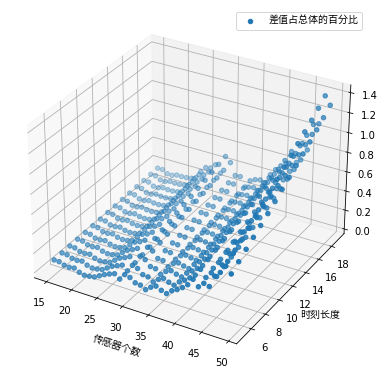

In [41]:
#15
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as mf
from matplotlib import rc

fig = plt.figure(figsize=(5,5))

ax = Axes3D(fig)
# ax.view_init(45, 80)

my_font= mf.FontProperties(fname='/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc') # 加载字体
rc('text',usetex=False) # 去取消利用Latex渲染标签

X,Y = np.meshgrid(sensor_num,windows)

# surf1 = ax.plot_surface(X,Y,test_np,alpha=0.5,rstride=1,cstride=1,label='原始数据集')
# surf2 = ax.plot_surface(X,Y,test_np_sa,alpha=0.5,rstride=1,cstride=1,label='聚合后数据集')
# surf1._facecolors2d = surf1._facecolor3d
# surf1._edgecolors2d = surf1._edgecolor3d
# surf2._facecolors2d = surf2._facecolor3d
# surf2._edgecolors2d = surf2._edgecolor3d
ax.set_xlabel('传感器个数',fontproperties=my_font)
ax.set_ylabel('时刻长度',fontproperties=my_font)
# ax.set_zlabel('dataframes')
# surf1._facecolors2d=surf1._facecolors3d


# ax.scatter(X,Y,test_np,alpha=0.5)
# ax.scatter(X,Y,test_np_sa,alpha=0.5)

# fig.savefig('s_w_3d.png',dpi=300,pad_inches=0,bbox_inches='tight')

percent = (test_np_sa - test_np)/test_np
ax.scatter(X,Y,percent,label='差值占总体的百分比')

ax.legend(prop=my_font)
# ax.plot_surface(X,Y,percent,alpha=0.5)
# ax.plot_surface(X,Y,percent,alpha=0.5,rstride=1,cstride=1)
fig.savefig('new_pic/9_c.png',dpi=300,pad_inches=0,bbox_inches='tight')
# fig.savefig('s_w_3d.pdf',format='pdf',bbox_inches='tight')

# 此处需要一个指标

/tmp/ipykernel_57199/564660664.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


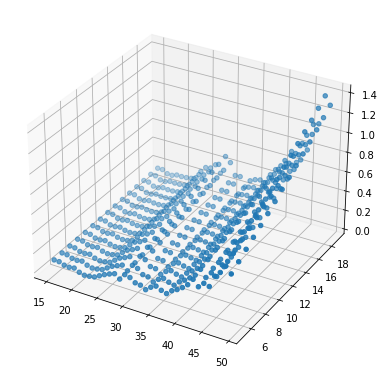

In [27]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(5,5))
# fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
# ax.view_init(45, 80)


X,Y = np.meshgrid(sensor_num,windows)

# ax.plot_surface(X,Y,test_np,alpha=0.5,rstride=1,cstride=1)
# ax.plot_surface(X,Y,test_np_sa,alpha=0.5,rstride=1,cstride=1)

# ax.scatter(X,Y,test_np,alpha=0.5)
# ax.scatter(X,Y,test_np_sa,alpha=0.5)

# fig.savefig('s_w_3d.png',dpi=300,pad_inches=0,bbox_inches='tight')

percent = (test_np_sa - test_np)/test_np
ax.scatter(X,Y,percent,label='xxx')

# ax.plot_surface(X,Y,percent,alpha=0.5)
# ax.plot_surface(X,Y,percent,alpha=0.5,rstride=1,cstride=1)
# fig.savefig('new_pic/9.png',dpi=300,pad_inches=0,bbox_inches='tight')

In [104]:
spatial_length = 25
temporal_length = 19

In [107]:
indices_ori = all_results[25][19]
indices_new = all_results_sa[25][19]

In [161]:
tensor_array = []
for i,item in enumerate(indices_ori):
    # print(item)
    tmp_tensor = np.zeros((spatial_length,temporal_length))
    # print(tmp_tensor.shape)
    for j in range(temporal_length):
        # print(j,len(tmp_tensor.T[j]))
        tmp_tensor.T[j] = results[item+j][origin_se_ids][:spatial_length] 
        # pass

    tensor_array.append(tmp_tensor)
    # print(tmp_tensor)


In [168]:
tensor_array_sa = []
for i,item in enumerate(indices_new):
    tmp_tensor = np.zeros((spatial_length,temporal_length))

    for j in range(temporal_length):
        tmp_tensor.T[j] = nnew_results[item+j][sa_se_ids][:spatial_length]
    
    tensor_array_sa.append(tmp_tensor)

In [170]:
len(tensor_array_sa),len(tensor_array)

(51883, 39425)

In [171]:
with open('tensor_array.pkl','wb') as f:
    pickle.dump(tensor_array,f)

with open('tensor_array_sa.pkl','wb') as f:
    pickle.dump(tensor_array_sa,f)

In [52]:
with open('all_results.pkl','wb') as f:
    pickle.dump(all_results,f)


In [53]:
with open('all_results_sa.pkl','wb') as f:
    pickle.dump(all_results_sa,f)